In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sc

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import plot_node_kuramoto
from simplicial_kuramoto.plotting import plot_edge_kuramoto
from simplicial_kuramoto.plotting import plot_flow
from simplicial_kuramoto.plotting import *

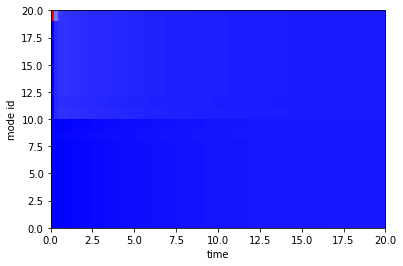

In [2]:
# test node Kuramoto
graph = modular_graph(2, 10, 2)
complex_test = SimplicialComplex(graph=graph)

# print("Incidence matrix:", complex_test.node_incidence_matrix)
complex_test.flip_edge_orientation(0)
# print("Orientation of 0 fliped:", complex_test.node_incidence_matrix)


initial_phase = np.zeros(len(graph))
initial_phase[0] = 1.0

results = integrate_node_kuramoto(complex_test, initial_phase, 20.0, 100)

plot_node_kuramoto(results)
plt.show()

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


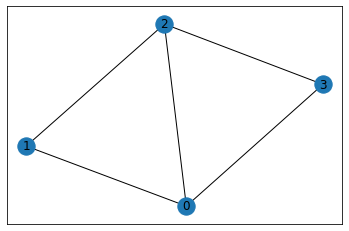

[[-1.  1.  0.  0.]
 [-1.  0.  0.  1.]
 [-1.  0.  1.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]
[[ 1.  0. -1.  1.  0.]]
(5, 200)
theta_0:  [2.80035734 0.0469459  4.36606658 6.25868273 0.86089116]
theta_final:  [ 2.15203898 -0.17293164  4.30407796  8.43522429  0.17293164]
theta_final:  [2.15203898 6.11025367 4.30407796 2.15203898 0.17293164]
Div:  [0. 0. 0. 0.]
Curl:  [0.]
L1 theta:  [ -6.28318531  -6.28318531 -12.56637061 -25.13274123  12.56637061]
L1 theta:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00001785e-10
 0.00000000e+00]
dim(Ker(L1)):  1
Ker(L1):  [[ 0.20412415]
 [-0.61237244]
 [ 0.40824829]
 [ 0.20412415]
 [ 0.61237244]]


In [3]:
# test edge Kuramoto
# cycle graph
Nn=4

G=nx.cycle_graph(Nn)
G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()

test_complex=SimplicialComplex(graph=G,faces=[(2,0,1)])

B0=test_complex.node_incidence_matrix
B1=test_complex.edge_incidence_matrix

print(B0.toarray())
print(B1.toarray())

Nn=B0.shape[1]
Ne=B0.shape[0]
Nf=B1.shape[0]

initial_phase=2*np.pi*np.random.rand(Ne)
t_max = 1000
n_t = 200

# result=integrate_edge_kuramoto(test_complex, initial_phase, t_max, n_t, omega_0=None, a=1)
result=integrate_edge_kuramoto(test_complex, initial_phase, t_max, n_t, omega_0=None)
print(result.y.shape)

plot_flow(initial_phase,test_complex,result,plotname=None)
    
# B0[1,0]=-B0[1,0]
# B0[1,-1]=-B0[1,-1]

# plotflow(theta_0,B0,B1,'All same orientations')
# plotflow(theta_final,B0,B1,'All same orientations') 

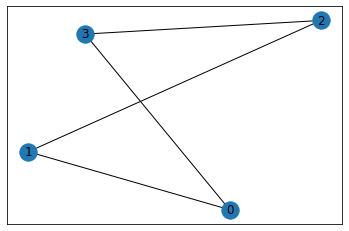

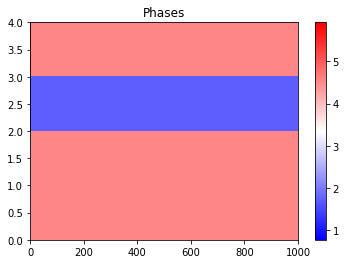

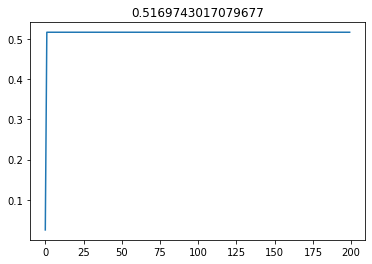

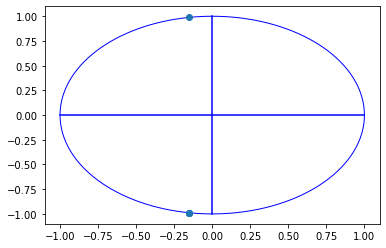

theta_0:  [5.92377772 0.77484032 2.79820851 4.0100238 ]
theta_final:  [4.56008875 1.72309655 4.56008875 4.56008875]
theta_final:  [4.56008875 1.72309655 4.56008875 4.56008875]
Div:  [0. 0. 0. 0.]
Curl: no curl
L1 theta:  [ -6.28318531 -12.56637061   0.          -6.28318531]
L1 theta:  [0. 0. 0. 0.]
dim(Ker(L1)):  1
Ker(L1):  [[-0.5]
 [ 0.5]
 [-0.5]
 [-0.5]]


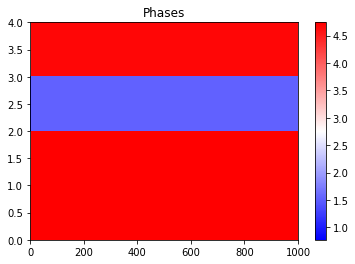

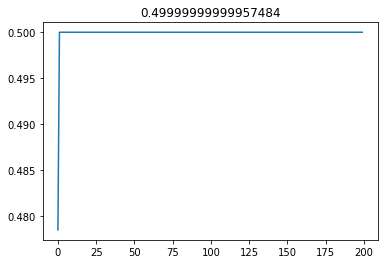

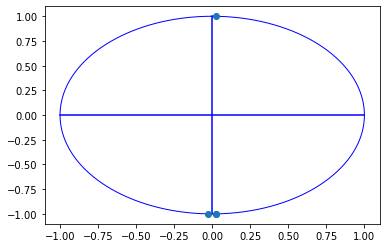

theta_0:  [5.92377772 0.77484032 2.79820851 4.0100238 ]
theta_final:  [4.68498541 1.54339276 4.73979255 4.73979255]
theta_final:  [4.68498541 1.54339276 4.73979255 4.73979255]
Div:  [3.14159265 3.14159265 0.         0.        ]
Curl: no curl
L1 theta:  [-12.56637061  -3.14159265  -9.42477796  -6.28318531]
L1 theta:  [1.00000008e-10 3.14159265e+00 3.14159265e+00 0.00000000e+00]
dim(Ker(L1)):  1
Ker(L1):  [[ 0.5]
 [ 0.5]
 [-0.5]
 [-0.5]]


In [4]:
G=nx.cycle_graph(4)
# G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()

test_complex=SimplicialComplex(graph=G,no_faces=True)

B0=test_complex.node_incidence_matrix
B1=test_complex.edge_incidence_matrix

Nn=B0.shape[1]
Ne=B0.shape[0]
if(B1!=None):
    Nf=B1.shape[0]

np.random.seed(4444)
initial_phase=2*np.pi*np.random.rand(Ne)
t_max = 1000
n_t = 200

result=integrate_edge_kuramoto(test_complex, initial_phase, t_max, n_t, omega_0=None)

plot_edge_kuramoto(result)
plt.show()
plot_order_parameter(result.y)
plot_unit_circle(result.y)

plot_flow(initial_phase,test_complex,result,plotname=None)

ef=0
test_complex.flip_edge_orientation(ef)
result=integrate_edge_kuramoto(test_complex, initial_phase, t_max, n_t, omega_0=None)

result.y[ef,:]=np.mod(np.around(result.y[ef,:]-np.pi, 10), np.around(2 * np.pi, 10))
plot_edge_kuramoto(result)
plt.show()
plot_order_parameter(result.y)
plot_unit_circle(result.y)

plot_flow(initial_phase,test_complex,result,plotname=None)